In [1]:
#!/usr/bin/env python3
""" Module for creating sparse autoencoder"""
import tensorflow.keras as keras


def autoencoder(input_dims, hidden_layers, latent_dims, lambtha):
    """
    Creates a sparse autoencoder

    Inputs:
    input_dims: integer containing the dimensions of the model input
    hidden_layers: list containing the number of nodes for each hidden layer in
    the encoder, respectively the hidden layers should be reversed
    for the decoder
    latent_dims: integer containing the dimensions of the latent space
    representation
    lambtha: regularization parameter used for L1 regularization
    on the encoded output

    Returns: encoder, decoder, auto
    encoder: encoder model
    decoder: decoder model
    auto: full autoencoder model
    """

    regularize = keras.regularizers.l1(lambtha)
    input_image = keras.Input(shape=(input_dims,))

    # Build encoder
    encode = input_image
    for layer in hidden_layers:
        encode = keras.layers.Dense(layer, activation='relu')(encode)
    encode = keras.layers.Dense(latent_dims, activation='relu',
                                activity_regularizer=regularize)(encode)
    encoder = keras.Model(input_image, encode, name='encoder')

    # Build Decoder
    decode_image_size = keras.Input(shape=(latent_dims,))
    decode = decode_image_size
    for layer in hidden_layers[::-1]:
        decode = keras.layers.Dense(layer, activation='relu')(decode)
    decode = keras.layers.Dense(input_dims, activation='sigmoid')(decode)
    decoder = keras.Model(decode_image_size, decode, name='decoder')

    # AutoEncoder
    encode_output = encoder(input_image)
    decode_output = decoder(encode_output)
    autoencoder = keras.Model(
        inputs=input_image,
        outputs=decode_output,
        name='autoencoder')

    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return encoder, decoder, autoencoder


Epoch 1/100


2024-06-20 10:38:42.021254: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-06-20 10:38:42.021274: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 48.00 GB
2024-06-20 10:38:42.021279: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 18.00 GB
2024-06-20 10:38:42.021306: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-20 10:38:42.021319: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-06-20 10:38:42.226821: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/235 [..............................] - ETA: 1:19 - loss: 0.7005

2024-06-20 10:38:42.380323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 2s 6ms/step - loss: 17.0858 - val_loss: 305.7713
Epoch 2/100
  1/235 [..............................] - ETA: 1s - loss: 305.6253

2024-06-20 10:38:43.715316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 4ms/step - loss: 33390.4766 - val_loss: 108055.8203
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 645335.5625 - val_loss: 938337.1875
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 1739196.2500 - val_loss: 5727548.5000
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 17797020.0000 - val_loss: 34796832.0000
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 37867660.0000 - val_loss: 35757056.0000
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 49828008.0000 - val_loss: 77109648.0000
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 182185104.0000 - val_loss: 269020992.0000
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 403679776.0000 - val_loss: 518356192.0000
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 516116032.0000 - val_lo

235/235 [==============================] - 1s 4ms/step - loss: 1308803072000.0000 - val_loss: 1293914079232.0000
Epoch 70/100
235/235 [==============================] - 1s 4ms/step - loss: 1441178976256.0000 - val_loss: 1419462311936.0000
Epoch 71/100
235/235 [==============================] - 1s 4ms/step - loss: 1474048819200.0000 - val_loss: 1448419131392.0000
Epoch 72/100
235/235 [==============================] - 1s 5ms/step - loss: 1426938265600.0000 - val_loss: 1479516356608.0000
Epoch 73/100
235/235 [==============================] - 1s 5ms/step - loss: 1631468388352.0000 - val_loss: 1770707091456.0000
Epoch 74/100
235/235 [==============================] - 1s 4ms/step - loss: 1707746656256.0000 - val_loss: 1686060400640.0000
Epoch 75/100
235/235 [==============================] - 1s 4ms/step - loss: 1636229971968.0000 - val_loss: 1714627805184.0000
Epoch 76/100
235/235 [==============================] - 1s 5ms/step - loss: 1795498704896.0000 - val_loss: 1836144263168.0000
Epoch

2024-06-20 10:40:27.984549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-20 10:40:28.022341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


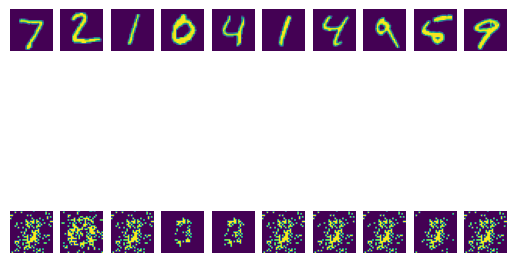

In [2]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

autoencoder = __import__('1-sparse').autoencoder

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
np.random.seed(0)
tf.random.set_seed(0)
encoder, decoder, auto = autoencoder(784, [128, 64], 32, 10e-6)
auto.fit(x_train, x_train, epochs=100,batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))
encoded = encoder.predict(x_test[:10])
print(np.mean(encoded))
reconstructed = decoder.predict(encoded)

for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    ax.axis('off')
    plt.imshow(x_test[i].reshape((28, 28)))
    ax = plt.subplot(2, 10, i + 11)
    ax.axis('off')
    plt.imshow(reconstructed[i].reshape((28, 28)))
plt.show()


In [3]:
import tensorflow as tf
print(tf.__version__)


2.12.0
